## Regresión Lineal en Python

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Ingresamos los datos

In [2]:
f=int(input("Digite el numero de elementos de x,y "))
f1=f
x=np.zeros((f,1)).reshape(f,1)
y=np.zeros((f,1)).reshape(f,1)
print("Elementos de X")
for i in range(0,f):
    x[i]=input("Elemento ["+str(i+1)+"]: ")
print("Elementos de Y")
for i in range(0,f):
    y[i]=input("Elemento ["+str(i+1)+"]: ")

Digite el numero de elementos de x,y  9


Elementos de X


Elemento [1]:  2
Elemento [2]:  4
Elemento [3]:  5
Elemento [4]:  8
Elemento [5]:  9
Elemento [6]:  11
Elemento [7]:  14
Elemento [8]:  17
Elemento [9]:  21


Elementos de Y


Elemento [1]:  30
Elemento [2]:  28
Elemento [3]:  24
Elemento [4]:  22
Elemento [5]:  32
Elemento [6]:  20
Elemento [7]:  23
Elemento [8]:  14
Elemento [9]:  10


Creamos Z con su Transpuesta y digitamos el nivel del polinomio 

In [3]:
z1=np.repeat(1,f).reshape(f,1)
c=int(input("N "))
z=np.zeros((f,c+1))
for i in range(0,f):
    for j in range(0,c+1): 
            z[i,j] = x[i]**j
zt=z.transpose()

N  2


Calculamos 
\begin{gather*}
w=Z^t*Z
\end{gather*}

In [4]:
w=np.zeros((zt.shape[0],z.shape[1]))
for i in range(0,zt.shape[0]):
    for j in range(0,z.shape[1]):
        for k in range(0,z.shape[0]):
            w[i,j]+=zt[i,k]*z[k,j]

Calculamos 
\begin{gather*}
s=Z^t*y
\end{gather*}

In [5]:
s=np.zeros((zt.shape[0],y.shape[1]))
for i in range(0,zt.shape[0]):
    for j in range(0,y.shape[1]):
        for k in range(0,y.shape[0]):
            s[i,j]+=zt[i,k]*y[k,j]

Para hallar las respuestas
\begin{gather*}
r=w^{-1}*s
\end{gather*}

In [7]:
wI=np.linalg.inv(w)
r=np.zeros((wI.shape[0],s.shape[1]))
for i in range(0,wI.shape[0]):
    for j in range(0,s.shape[1]):
        for k in range(0,s.shape[0]):
            r[i,j]+=wI[i,k]*s[k,j]
r

array([[28.6112931 ],
       [-0.04625371],
       [-0.04065687]])

Hallamos el ypred

In [8]:
ypred=np.zeros((f,1))
for i in range(0,f):
    for j in range(0,r.shape[0]):
       ypred[i]+=r[j]*x[i]**j
ypred

array([[28.35615819],
       [27.77576831],
       [27.36360275],
       [25.63922363],
       [24.9018031 ],
       [23.18302081],
       [19.99499431],
       [16.07514412],
       [ 9.71028478]])

Calculamos la sumatoria del $error^2$
\begin{gather*}
\sum error^2=(y-ypred)^2
\end{gather*}

In [9]:
error=np.zeros((f,1))
for i in range(0,f):
    error[i]=(y[i]-ypred[i])**2
sume=sum(error)

Encontramos la sumatoria del $(y-prome(y))^2$
\begin{gather*}
\sum (y-promw(y))^2
\end{gather*}


In [10]:
promey=np.zeros((f,1))
for i in range(0,f):
    promey[i]=(y[i]-y.mean())**2
sump=sum(promey)

Para finalizar calculamos $R^2$, para ver que tan confiable es el polinomio
\begin{gather*}
R^2=1-\frac{\sum error^2}{\sum (y-promw(y))^2}
\end{gather*}


In [13]:
R=1-(sume/sump)
R[0]

0.755574422720616

## Gráfica

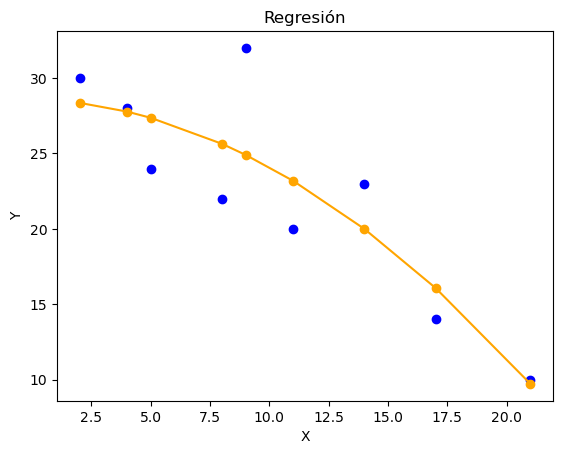

In [15]:
plt.scatter(x,y,color="blue")
plt.plot(x,ypred,color="orange")
plt.scatter(x,ypred,color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresión")
plt.show()